# Lending Club Case Study

## Load & Understand The Data

In [2]:
# Import All the Required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np 
import warnings

In [3]:
# Filter Warnings
warnings.filterwarnings(action='ignore')

In [4]:
# Load the data into a Dataframe & perform basic data checks
loanData = pd.read_csv("loan.csv")

In [5]:
loanData.shape

(39717, 111)

In [6]:
loanData.head(5)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [7]:
# Check if the columns in data match the data dictionary
for column in loanData.columns:
    print(column)

id
member_id
loan_amnt
funded_amnt
funded_amnt_inv
term
int_rate
installment
grade
sub_grade
emp_title
emp_length
home_ownership
annual_inc
verification_status
issue_d
loan_status
pymnt_plan
url
desc
purpose
title
zip_code
addr_state
dti
delinq_2yrs
earliest_cr_line
inq_last_6mths
mths_since_last_delinq
mths_since_last_record
open_acc
pub_rec
revol_bal
revol_util
total_acc
initial_list_status
out_prncp
out_prncp_inv
total_pymnt
total_pymnt_inv
total_rec_prncp
total_rec_int
total_rec_late_fee
recoveries
collection_recovery_fee
last_pymnt_d
last_pymnt_amnt
next_pymnt_d
last_credit_pull_d
collections_12_mths_ex_med
mths_since_last_major_derog
policy_code
application_type
annual_inc_joint
dti_joint
verification_status_joint
acc_now_delinq
tot_coll_amt
tot_cur_bal
open_acc_6m
open_il_6m
open_il_12m
open_il_24m
mths_since_rcnt_il
total_bal_il
il_util
open_rv_12m
open_rv_24m
max_bal_bc
all_util
total_rev_hi_lim
inq_fi
total_cu_tl
inq_last_12m
acc_open_past_24mths
avg_cur_bal
bc_open_to_buy
bc

- Columns in the data dictionary are not same as the columns in the actual data.
- There are too many columns to be analysed. We can split the analysis for every 20 columns

## Data Cleansing

### Columns 1 to 20

In [8]:
columns_1_to_20  = ['acc_now_delinq', 'addr_state', 'annual_inc', 'application_type', 'chargeoff_within_12_mths', 'collection_recovery_fee', 'collections_12_mths_ex_med', 'delinq_2yrs', 'delinq_amnt', 'desc', 'dti', 'earliest_cr_line', 'emp_length', 'emp_title', 'funded_amnt', 'funded_amnt_inv', 'grade', 'home_ownership', 'id', 'il_util']

In [9]:
loanData[columns_1_to_20].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   acc_now_delinq              39717 non-null  int64  
 1   addr_state                  39717 non-null  object 
 2   annual_inc                  39717 non-null  float64
 3   application_type            39717 non-null  object 
 4   chargeoff_within_12_mths    39661 non-null  float64
 5   collection_recovery_fee     39717 non-null  float64
 6   collections_12_mths_ex_med  39661 non-null  float64
 7   delinq_2yrs                 39717 non-null  int64  
 8   delinq_amnt                 39717 non-null  int64  
 9   desc                        26775 non-null  object 
 10  dti                         39717 non-null  float64
 11  earliest_cr_line            39717 non-null  object 
 12  emp_length                  38642 non-null  object 
 13  emp_title                   372

#### Observations
- collections_12_mths_ex_med -  39661 - 56 missing entries
- desc - 26775 - 12942 missing entries
- emp_length - 38642 - 1255 missing entries
- emp_title  - 37258 - 2459 missing entries
- il_util - 0 non null values - Drop the column

In [10]:
# Drop the il_util column
loanData.drop('il_util', axis=1, inplace=True)

In [11]:
columns_1_to_20.remove('il_util')

### Now that we know there might be columns where all values are null. Check and either drop all such columns or fill with mean/mode values.

#### Drop all columns with NA values in all rows.

In [12]:
# Check for columns where there are complete null values and remove all those
loanData = loanData.dropna(axis=1, how='all')

In [13]:
len(loanData.columns)

57

In [14]:
for column in loanData.columns:
    print(column)

id
member_id
loan_amnt
funded_amnt
funded_amnt_inv
term
int_rate
installment
grade
sub_grade
emp_title
emp_length
home_ownership
annual_inc
verification_status
issue_d
loan_status
pymnt_plan
url
desc
purpose
title
zip_code
addr_state
dti
delinq_2yrs
earliest_cr_line
inq_last_6mths
mths_since_last_delinq
mths_since_last_record
open_acc
pub_rec
revol_bal
revol_util
total_acc
initial_list_status
out_prncp
out_prncp_inv
total_pymnt
total_pymnt_inv
total_rec_prncp
total_rec_int
total_rec_late_fee
recoveries
collection_recovery_fee
last_pymnt_d
last_pymnt_amnt
next_pymnt_d
last_credit_pull_d
collections_12_mths_ex_med
policy_code
application_type
acc_now_delinq
chargeoff_within_12_mths
delinq_amnt
pub_rec_bankruptcies
tax_liens


- Observations
- There are 57 columns left in the loanData dataframe which have non null values

#### Columns - Part1

In [15]:
cols_part1 = ['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status']

In [16]:
loanData[cols_part1].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   39717 non-null  int64  
 1   member_id            39717 non-null  int64  
 2   loan_amnt            39717 non-null  int64  
 3   funded_amnt          39717 non-null  int64  
 4   funded_amnt_inv      39717 non-null  float64
 5   term                 39717 non-null  object 
 6   int_rate             39717 non-null  object 
 7   installment          39717 non-null  float64
 8   grade                39717 non-null  object 
 9   sub_grade            39717 non-null  object 
 10  emp_title            37258 non-null  object 
 11  emp_length           38642 non-null  object 
 12  home_ownership       39717 non-null  object 
 13  annual_inc           39717 non-null  float64
 14  verification_status  39717 non-null  object 
dtypes: float64(3), int64(4), object(8)
m

- emp_title and emp_length have few missing values. Check the distinct values for these two columns
- Additionally, below are the columns which do not add any value to identify if the loan applicant will be defaulter or not
    - id
    - member
    - emp_title

In [17]:
loanData.drop(['emp_title', 'id', 'member_id'], axis=1, inplace=True)

In [18]:
for column in ['emp_title', 'id', 'member_id']:
    cols_part1.remove(column)

- emp_length has missing values. Lets try and fill or drop those

In [19]:
loanData['emp_length'].unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', nan],
      dtype=object)

In [20]:
loanData['emp_length'].value_counts()

emp_length
10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: count, dtype: int64

- 39717-38642=75 missing values. Since the number is very less. We shall try filling it with most common value or drop the rows.

In [21]:
loanData['emp_length'].mode()

0    10+ years
Name: emp_length, dtype: object

- 10+ Years seems to be most frequent value. We can fill the missing values with the mode value.

In [22]:
loanData['emp_length'] = loanData['emp_length'].fillna(loanData['emp_length'].mode()[0])

In [23]:
loanData['emp_length'].unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years'],
      dtype=object)

In [24]:
loanData.shape

(39717, 54)

In [25]:
loanData[cols_part1].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loan_amnt            39717 non-null  int64  
 1   funded_amnt          39717 non-null  int64  
 2   funded_amnt_inv      39717 non-null  float64
 3   term                 39717 non-null  object 
 4   int_rate             39717 non-null  object 
 5   installment          39717 non-null  float64
 6   grade                39717 non-null  object 
 7   sub_grade            39717 non-null  object 
 8   emp_length           39717 non-null  object 
 9   home_ownership       39717 non-null  object 
 10  annual_inc           39717 non-null  float64
 11  verification_status  39717 non-null  object 
dtypes: float64(3), int64(2), object(7)
memory usage: 3.6+ MB


#### Columns - Part 2

In [26]:
cols_part2 = ['issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose', 'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record']

In [27]:
loanData[cols_part2].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   issue_d                 39717 non-null  object 
 1   loan_status             39717 non-null  object 
 2   pymnt_plan              39717 non-null  object 
 3   url                     39717 non-null  object 
 4   desc                    26775 non-null  object 
 5   purpose                 39717 non-null  object 
 6   title                   39706 non-null  object 
 7   zip_code                39717 non-null  object 
 8   addr_state              39717 non-null  object 
 9   dti                     39717 non-null  float64
 10  delinq_2yrs             39717 non-null  int64  
 11  earliest_cr_line        39717 non-null  object 
 12  inq_last_6mths          39717 non-null  int64  
 13  mths_since_last_delinq  14035 non-null  float64
 14  mths_since_last_record  2786 non-null 

- check the distinct values for desc, mths_since_last_delinq, mths_since_last_record

- Looks like a free text field, don't see any value for our analysis. Lets drop the column

- Out of the above columns, url, desc, title, zip_code, addr_state,  does not really add any value for our analysis.
- Number of months since last deliquency does not add any value for our analysis as this data is captured post loan is Approved.
- Same is the case with mths_since_last_record. We shall remove these columns.

In [28]:
loanData.drop(['url', 'desc', 'title', 'zip_code', 'addr_state', 'delinq_2yrs', 'mths_since_last_delinq', 'mths_since_last_record'], axis=1, inplace=True)

In [29]:
for column in ['url', 'desc', 'title', 'zip_code', 'addr_state', 'delinq_2yrs', 'mths_since_last_delinq', 'mths_since_last_record']:
    cols_part2.remove(column)

#### Columns - Part 3

In [30]:
cols_part3 = ['open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d']

In [31]:
loanData[cols_part3].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   open_acc                 39717 non-null  int64  
 1   pub_rec                  39717 non-null  int64  
 2   revol_bal                39717 non-null  int64  
 3   revol_util               39667 non-null  object 
 4   total_acc                39717 non-null  int64  
 5   initial_list_status      39717 non-null  object 
 6   out_prncp                39717 non-null  float64
 7   out_prncp_inv            39717 non-null  float64
 8   total_pymnt              39717 non-null  float64
 9   total_pymnt_inv          39717 non-null  float64
 10  total_rec_prncp          39717 non-null  float64
 11  total_rec_int            39717 non-null  float64
 12  total_rec_late_fee       39717 non-null  float64
 13  recoveries               39717 non-null  float64
 14  collection_recovery_fe

- revol_bal, out_prncp, out_prncp_inv, total_pymnt, total_pymnt_inv, total_rec_prncp, total_rec_int, total_rec_late_fee, recoveries, collection_recovery_fee and last_pymnt_d do not add any value for our analysis as this data is captured post loan is Approved.

In [32]:
loanData.drop(['revol_bal', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d'], axis=1, inplace=True)

In [33]:
for column in ['revol_bal', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d']:
    cols_part3.remove(column)

#### Columns Part 4

In [34]:
cols_part4 = ['last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med', 'policy_code', 'application_type', 'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt', 'pub_rec_bankruptcies', 'tax_liens']

In [35]:
loanData[cols_part4].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   last_pymnt_amnt             39717 non-null  float64
 1   next_pymnt_d                1140 non-null   object 
 2   last_credit_pull_d          39715 non-null  object 
 3   collections_12_mths_ex_med  39661 non-null  float64
 4   policy_code                 39717 non-null  int64  
 5   application_type            39717 non-null  object 
 6   acc_now_delinq              39717 non-null  int64  
 7   chargeoff_within_12_mths    39661 non-null  float64
 8   delinq_amnt                 39717 non-null  int64  
 9   pub_rec_bankruptcies        39020 non-null  float64
 10  tax_liens                   39678 non-null  float64
dtypes: float64(5), int64(3), object(3)
memory usage: 3.3+ MB


- last_pymnt_amnt, next_pymnt_d, last_credit_pull_d, chargeoff_within_12_mths do not add any value for our analysis as this data is captured post loan is Approved.

In [36]:
loanData.drop(['last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d', 'chargeoff_within_12_mths'], axis=1, inplace=True)


In [37]:
for column in ['last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d', 'chargeoff_within_12_mths']:
    cols_part4.remove(column)

#### Lets analyse the remaining columns and check what all columns are significant for identifying the defaulters

In [38]:
loanData.shape

(39717, 31)

In [39]:
loanData.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'pymnt_plan', 'purpose', 'dti', 'earliest_cr_line', 'inq_last_6mths',
       'open_acc', 'pub_rec', 'revol_util', 'total_acc', 'initial_list_status',
       'collections_12_mths_ex_med', 'policy_code', 'application_type',
       'acc_now_delinq', 'delinq_amnt', 'pub_rec_bankruptcies', 'tax_liens'],
      dtype='object')

- Columns that need some value checks based on the data dictionary
- 'pymnt_plan', 'initial_list_status', 'collections_12_mths_ex_med', 'policy_code','application_type', 'acc_now_delinq', 'delinq_amnt','pub_rec_bankruptcies', 'tax_liens

- Lets check the values for each of the columns

In [40]:
loanData['pymnt_plan'].unique()

array(['n'], dtype=object)

- Looks like none of the aplicants have any payment plan in place. As the value is 'n' - probably means no. Since single value does not make any difference for differentiating loan defaulters or the ones are going to repay. We shall drop this column 

In [41]:
loanData.drop('pymnt_plan', axis=1, inplace=True)

In [42]:
loanData['initial_list_status'].unique()

array(['f'], dtype=object)

- As we saw earlier, single values do not make any difference for our analysis. Dropping the column

In [43]:
loanData.drop('initial_list_status', axis=1, inplace=True)

In [44]:
loanData['collections_12_mths_ex_med'].unique()

array([ 0., nan])

- Values are 0 and Not A Number - meaning data unavailable. This also does not add any benefit to our analysis. Lets drop this column.

In [45]:
loanData.drop('collections_12_mths_ex_med', axis=1, inplace=True)

In [46]:
loanData['policy_code'].unique()

array([1], dtype=int64)

- Single Value, lets drop the column

In [47]:
loanData.drop('policy_code', axis=1, inplace=True)

In [48]:
loanData['application_type'].unique()

array(['INDIVIDUAL'], dtype=object)

- Single Value, lets drop the column

In [49]:
loanData.drop('application_type', axis=1, inplace=True)

In [50]:
loanData['acc_now_delinq'].unique()

array([0], dtype=int64)

- Single Value, lets drop the column

In [51]:
loanData.drop('acc_now_delinq', axis=1, inplace=True)

In [52]:
loanData['delinq_amnt'].unique()

array([0], dtype=int64)

- Single Value, lets drop the column

In [53]:
loanData.drop('delinq_amnt', axis=1, inplace=True)

In [54]:
loanData['pub_rec_bankruptcies'].unique()

array([ 0.,  1.,  2., nan])

- There are few values, looks like a categorical variable. Lets check the count for each category.

In [55]:
loanData['pub_rec_bankruptcies'].value_counts()

pub_rec_bankruptcies
0.0    37339
1.0     1674
2.0        7
Name: count, dtype: int64

In [56]:
loanData['pub_rec_bankruptcies'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 39717 entries, 0 to 39716
Series name: pub_rec_bankruptcies
Non-Null Count  Dtype  
--------------  -----  
39020 non-null  float64
dtypes: float64(1)
memory usage: 310.4 KB


- Most of the values are available, only few are missing. We can fill the value with the majority category.

In [57]:
loanData['pub_rec_bankruptcies'] = loanData['pub_rec_bankruptcies'].fillna(0)

In [58]:
loanData['pub_rec_bankruptcies'].unique()

array([0., 1., 2.])

In [59]:
# tax_liens
loanData['tax_liens'].unique()

array([ 0., nan])

- Values are 0 and Not A Number - meaning data unavailable. This also does not add any benefit to our analysis. Lets drop this column.

In [60]:
loanData.drop('tax_liens', axis=1, inplace=True)

## Data Cleansing - Part 2

### Check if the datatypes are accurate

In [61]:
loanData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             39717 non-null  int64  
 1   funded_amnt           39717 non-null  int64  
 2   funded_amnt_inv       39717 non-null  float64
 3   term                  39717 non-null  object 
 4   int_rate              39717 non-null  object 
 5   installment           39717 non-null  float64
 6   grade                 39717 non-null  object 
 7   sub_grade             39717 non-null  object 
 8   emp_length            39717 non-null  object 
 9   home_ownership        39717 non-null  object 
 10  annual_inc            39717 non-null  float64
 11  verification_status   39717 non-null  object 
 12  issue_d               39717 non-null  object 
 13  loan_status           39717 non-null  object 
 14  purpose               39717 non-null  object 
 15  dti                

- Term and interest Rate 
- Check values for the columns

In [62]:
loanData[['term', 'int_rate']].head()

,term,int_rate
0,36 months,10.65%
1,60 months,15.27%
2,36 months,15.96%
3,36 months,13.49%
4,60 months,12.69%


- term - The values are in months, we can create a new column which has only the integer value and convert the datatype to integer.
- This will be helpful while finding the relationship with other attributes

In [63]:
loanData['term'].apply(lambda x: int(x.split(' ')[1])).unique()

array([36, 60], dtype=int64)

In [64]:
loanData['term_of_loan'] = loanData['term'].apply(lambda x: int(x.split(' ')[1]))

In [65]:
loanData['term_of_loan'].value_counts()

term_of_loan
36    29096
60    10621
Name: count, dtype: int64

In [66]:
# Drop the column term
loanData.drop('term', axis=1, inplace=True)

- int_rate - The values are in decimals along with percentage symbol.
- int_rate_percent - we can create a new column which has only the numerical value and convert the datatype to float.
- This will be helpful while finding the relationship with other attributes

In [67]:
loanData['int_rate'].apply(lambda x: float(x[:-1]))

0        10.65
1        15.27
2        15.96
3        13.49
4        12.69
         ...  
39712     8.07
39713    10.28
39714     8.07
39715     7.43
39716    13.75
Name: int_rate, Length: 39717, dtype: float64

In [68]:
loanData['int_rate_percent'] = loanData['int_rate'].apply(lambda x: float(x[:-1]))

In [69]:
loanData['int_rate_percent'].describe()

count    39717.000000
mean        12.021177
std          3.724825
min          5.420000
25%          9.250000
50%         11.860000
75%         14.590000
max         24.590000
Name: int_rate_percent, dtype: float64

In [70]:
# Drop int_rate column
loanData.drop('int_rate', axis=1, inplace=True)

- Continue Data Cleansing checks for below attributes
- grade
- sub_grade
- emp_length
- home_ownership

In [71]:
loanData[['grade', 'sub_grade', 'emp_length', 'home_ownership']][loanData['emp_length'] == '9 years']

,grade,sub_grade,emp_length,home_ownership
7,E,E1,9 years,RENT
26,C,C2,9 years,RENT
42,D,D5,9 years,MORTGAGE
51,B,B1,9 years,RENT
88,D,D1,9 years,RENT
...,...,...,...,...
39638,D,D2,9 years,MORTGAGE
39645,C,C5,9 years,MORTGAGE
39661,A,A3,9 years,OWN
39669,F,F1,9 years,MORTGAGE


- We can create a new column emp_duration using emp_length.
- We shall use only the integer value and strip off other alpha characters
- There are no values with '10 years'. Basically, if the duration is '10 years', the value is '10+ years' and same for the records if the duration is more than 10 years. Hence removing '+' from the value, doesn't make any difference. Same is the case with '< 1 year'

In [72]:
'''
This function is used to apply basic transformations on emp_length column and convert the datatype to int.
'''
def emp_duration_fun(x):
    if '+' in x:
        index_val = x.index('+')
        return x[:index_val]
    elif '<' in x:
        return int(x.split(' ')[1])
    else:
        return int(x.split(' ')[0])

In [73]:
loanData['emp_duration'] = loanData['emp_length'].apply(emp_duration_fun)

In [74]:
loanData['emp_duration'].value_counts()

emp_duration
10    9954
1     7823
2     4388
3     4095
4     3436
5     3282
6     2229
7     1773
8     1479
9     1258
Name: count, dtype: int64

- Continue Data Cleansing for  below:
- verification_status
- issue_d
- loan_status
- purpose

In [75]:
# Drop emp_length column
loanData.drop('emp_length', axis=1, inplace=True)

In [76]:
loanData[['verification_status', 'issue_d', 'loan_status', 'purpose']].head()

,verification_status,issue_d,loan_status,purpose
0,Verified,Dec-11,Fully Paid,credit_card
1,Source Verified,Dec-11,Charged Off,car
2,Not Verified,Dec-11,Fully Paid,small_business
3,Source Verified,Dec-11,Fully Paid,other
4,Source Verified,Dec-11,Current,other


- issue_d -> Date of issue 
- We can create a new columns issue_year and issue_month using issue_d

In [77]:
loanData['issue_year'] = pd.to_datetime(loanData['issue_d'], format='%b-%y').dt.strftime('%Y')

In [78]:
loanData['issue_month'] = loanData['issue_d'].apply(lambda x: x.split('-')[0])

In [79]:
# Drop issue_d column
loanData.drop('issue_d', axis=1, inplace=True)

- Continue the cleansing for below:
- earliest_cr_line              
- revol_util                 
- application_type

In [80]:
loanData[['earliest_cr_line', 'revol_util']].head()

,earliest_cr_line,revol_util
0,Jan-85,83.70%
1,Apr-99,9.40%
2,Nov-01,98.50%
3,Feb-96,21%
4,Jan-96,53.90%


- revol_util can be used to create a new column with just numerical values
- the column will be revol_cred_util_percent

In [81]:

loanData['revol_util'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 39717 entries, 0 to 39716
Series name: revol_util
Non-Null Count  Dtype 
--------------  ----- 
39667 non-null  object
dtypes: object(1)
memory usage: 310.4+ KB


- There are some missing values. Either we can fill with the most common value or mean value or drop the rows.
- Since the rows are less, we can drop the rows as it won't affect the analysis by much.

In [82]:
loanData.shape

(39717, 24)

In [83]:
loanDataF1 = loanData[~ loanData['revol_util'].isna()]
loanDataF1.shape

(39667, 24)

In [84]:
loanDataF1['revol_cred_util_percent'] = loanDataF1['revol_util'].apply(lambda x: float(x[:-1]))

In [85]:
# Drop revol_util column
loanDataF1.drop('revol_util', axis=1, inplace=True)

### Filter the unnecessary data for analysis

In [86]:
loanDataF1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39667 entries, 0 to 39716
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   loan_amnt                39667 non-null  int64  
 1   funded_amnt              39667 non-null  int64  
 2   funded_amnt_inv          39667 non-null  float64
 3   installment              39667 non-null  float64
 4   grade                    39667 non-null  object 
 5   sub_grade                39667 non-null  object 
 6   home_ownership           39667 non-null  object 
 7   annual_inc               39667 non-null  float64
 8   verification_status      39667 non-null  object 
 9   loan_status              39667 non-null  object 
 10  purpose                  39667 non-null  object 
 11  dti                      39667 non-null  float64
 12  earliest_cr_line         39667 non-null  object 
 13  inq_last_6mths           39667 non-null  int64  
 14  open_acc                 39

- For the analysis, we need to consider only the applications which are either defaulted i.e. charged off or full paid by the customer.
- lets filter the data based on the values in loan_status

In [87]:
loanDataF1['loan_status'].value_counts()

loan_status
Fully Paid     32916
Charged Off     5611
Current         1140
Name: count, dtype: int64

- We can filter out the values with the loan_status 'Current'

In [88]:
loanDataF2 = loanDataF1[loanDataF1['loan_status'] != 'Current']
loanDataF2.shape

(38527, 24)

## Data Analysis - Part 1

In [89]:
loanDataF2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38527 entries, 0 to 39716
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   loan_amnt                38527 non-null  int64  
 1   funded_amnt              38527 non-null  int64  
 2   funded_amnt_inv          38527 non-null  float64
 3   installment              38527 non-null  float64
 4   grade                    38527 non-null  object 
 5   sub_grade                38527 non-null  object 
 6   home_ownership           38527 non-null  object 
 7   annual_inc               38527 non-null  float64
 8   verification_status      38527 non-null  object 
 9   loan_status              38527 non-null  object 
 10  purpose                  38527 non-null  object 
 11  dti                      38527 non-null  float64
 12  earliest_cr_line         38527 non-null  object 
 13  inq_last_6mths           38527 non-null  int64  
 14  open_acc                 38

- All the attributes have non-null values. Data looks good for analysis

In [90]:
loanDataF2.head()

,loan_amnt,funded_amnt,funded_amnt_inv,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,loan_status,...,open_acc,pub_rec,total_acc,pub_rec_bankruptcies,term_of_loan,int_rate_percent,emp_duration,issue_year,issue_month,revol_cred_util_percent
0,5000,5000,4975.0,162.87,B,B2,RENT,24000.0,Verified,Fully Paid,...,3,0,9,0.0,36,10.65,10,2011,Dec,83.7
1,2500,2500,2500.0,59.83,C,C4,RENT,30000.0,Source Verified,Charged Off,...,3,0,4,0.0,60,15.27,1,2011,Dec,9.4
2,2400,2400,2400.0,84.33,C,C5,RENT,12252.0,Not Verified,Fully Paid,...,2,0,10,0.0,36,15.96,10,2011,Dec,98.5
3,10000,10000,10000.0,339.31,C,C1,RENT,49200.0,Source Verified,Fully Paid,...,10,0,37,0.0,36,13.49,10,2011,Dec,21.0
5,5000,5000,5000.0,156.46,A,A4,RENT,36000.0,Source Verified,Fully Paid,...,9,0,12,0.0,36,7.90,3,2011,Dec,28.3


In [91]:
# Identifying if the data has any outliers
loanDataF2.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,inq_last_6mths,open_acc,pub_rec,total_acc,pub_rec_bankruptcies,term_of_loan,int_rate_percent,revol_cred_util_percent
count,38527.000000,38527.000000,38527.000000,38527.000000,3.852700e+04,38527.000000,38527.000000,38527.000000,38527.000000,38527.000000,38527.000000,38527.000000,38527.000000,38527.000000
mean,11055.265139,10791.956939,10230.940095,322.678650,6.880923e+04,13.276353,0.871752,9.281413,0.055442,22.067615,0.042723,41.904223,11.927378,48.702777
std,7348.433587,7090.256225,7022.678989,208.649278,6.421493e+04,6.671392,1.071756,4.400158,0.237853,11.422526,0.202876,10.336550,3.690161,28.364741
min,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,2.000000,0.000000,2.000000,0.000000,36.000000,5.420000,0.000000
25%,5325.000000,5200.000000,5000.000000,165.740000,4.000000e+04,8.140000,0.000000,6.000000,0.000000,13.000000,0.000000,36.000000,8.940000,25.200000
50%,9600.000000,9600.000000,8750.000000,278.150000,5.900000e+04,13.370000,1.000000,9.000000,0.000000,20.000000,0.000000,36.000000,11.710000,49.100000
75%,15000.000000,15000.000000,14000.000000,425.860000,8.200000e+04,18.560000,1.000000,12.000000,0.000000,29.000000,0.000000,36.000000,14.350000,72.300000
max,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,8.000000,44.000000,4.000000,90.000000,2.000000,60.000000,24.400000,99.900000


- Of all the values funded_amnt_inv, annual_inc seems to have huge difference between 50th percentile and mean.
- Lets find out if there are outliers using box plot

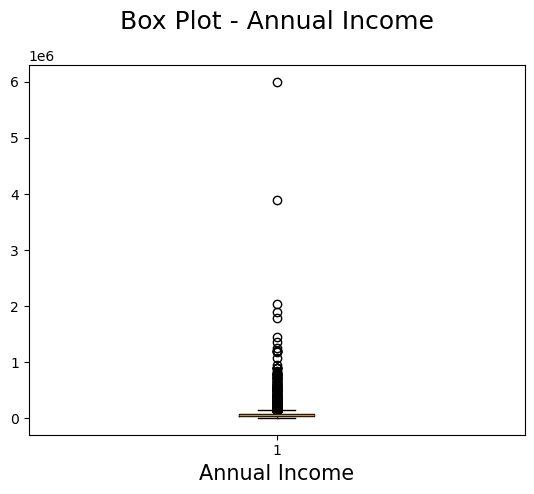

In [92]:
# loanDataF2['annual_inc'].plot.box()
plt.boxplot(x=loanDataF2['annual_inc'])
plt.title('Box Plot - Annual Income\n', fontdict={'fontsize':18})
plt.xlabel('Annual Income', fontdict={'fontsize':15})
plt.show()

- graph shows that there are lot of outliers. We need to get rid of outliers to ensure that the analysis is accurate.

- We can use remove 5% of outliers to begin with and verify if the data is within a fair range

In [93]:
remove_percent_quantile = loanDataF2['annual_inc'].quantile(0.95)

In [94]:
remove_percent_quantile

140004.0

In [95]:
loanDataF3 = loanDataF2[loanDataF2['annual_inc'] < remove_percent_quantile]

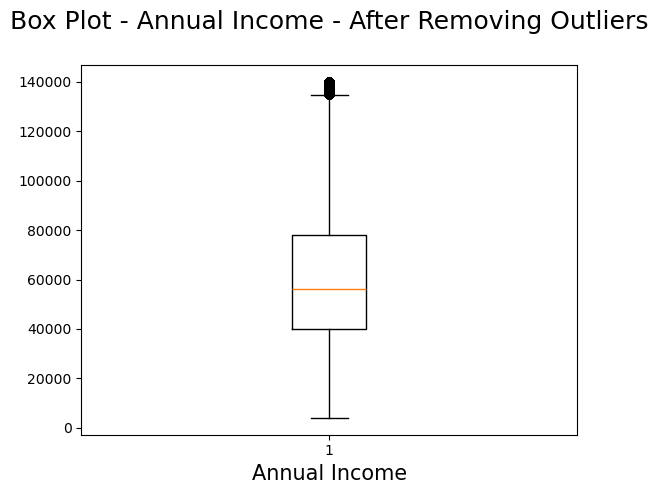

In [96]:
plt.boxplot(x=loanDataF3['annual_inc'])
plt.title('Box Plot - Annual Income - After Removing Outliers\n', fontdict={'fontsize':18})
plt.xlabel('Annual Income', fontdict={'fontsize':15})
plt.show()

- Graph looks much better after removing 5 percentile of the data.

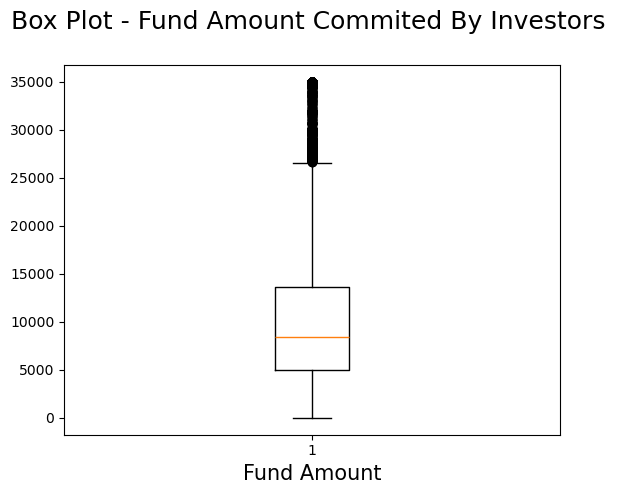

In [97]:
plt.boxplot(x=loanDataF3['funded_amnt_inv'])
plt.title('Box Plot - Fund Amount Commited By Investors \n', fontdict={'fontsize':18})
plt.xlabel('Fund Amount', fontdict={'fontsize':15})
plt.show()

- There are some outliers for this attribute. Lets check the percentiles.

In [98]:
loanDataF3['funded_amnt_inv'].quantile([0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

0.2     4200.000000
0.3     5500.000000
0.4     6955.935151
0.5     8394.564067
0.6    10000.000000
0.7    12000.000000
0.8    14975.000000
0.9    19750.000000
Name: funded_amnt_inv, dtype: float64

- The difference between 80th percentile and 90th percentile is huge compared to other percentiles.

- Lets check the distribution with more precision

In [99]:
loanDataF3['funded_amnt_inv'].quantile([0.8, 0.825, 0.85, 0.875, 0.9, 0.925, 0.95, 0.975])

0.800    14975.000000
0.825    15350.000000
0.850    16425.000000
0.875    17983.783373
0.900    19750.000000
0.925    20676.233635
0.950    23941.875589
0.975    25350.000000
Name: funded_amnt_inv, dtype: float64

- Even though there are some outliers, the difference when we consider detailed quantile values, the difference is not that much. So, lets retain the values.

## Data Analysis - Part 2

In [100]:
loanDataF3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36594 entries, 0 to 39716
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   loan_amnt                36594 non-null  int64  
 1   funded_amnt              36594 non-null  int64  
 2   funded_amnt_inv          36594 non-null  float64
 3   installment              36594 non-null  float64
 4   grade                    36594 non-null  object 
 5   sub_grade                36594 non-null  object 
 6   home_ownership           36594 non-null  object 
 7   annual_inc               36594 non-null  float64
 8   verification_status      36594 non-null  object 
 9   loan_status              36594 non-null  object 
 10  purpose                  36594 non-null  object 
 11  dti                      36594 non-null  float64
 12  earliest_cr_line         36594 non-null  object 
 13  inq_last_6mths           36594 non-null  int64  
 14  open_acc                 36

#### Grade & Loan Status

- We are interested in the loan status (Charged-Off & Fully Paid) and the relationship with other values.
- Lets see the trend with Grade and loan status

In [101]:
loanDataF3['loan_status'].value_counts()

loan_status
Fully Paid     31194
Charged Off     5400
Name: count, dtype: int64

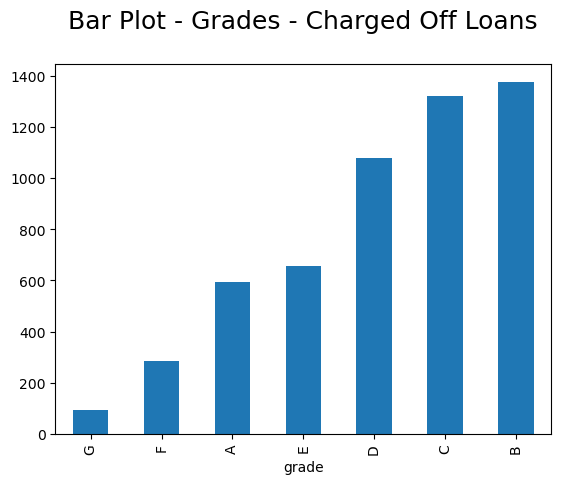

In [103]:
loanDataF3[loanDataF3['loan_status'] == 'Charged Off']['grade'].value_counts().sort_values().plot.bar()
plt.title('Bar Plot - Grades - Charged Off Loans\n', fontdict={'fontsize':18})
plt.show()

- Majority of Grade B, C & D have not paid the loans.

- Lets analyse if the subgrade makes any difference.

#### Grade & SubGrade

In [104]:
loanDataF3['sub_grade'] = loanDataF3['sub_grade'].apply(lambda x: int(x[-1]))
loanDataF3['sub_grade'].value_counts()

sub_grade
4    7677
3    7542
5    7430
2    7254
1    6691
Name: count, dtype: int64

- Grade G have less applicants who have fully paid the loans

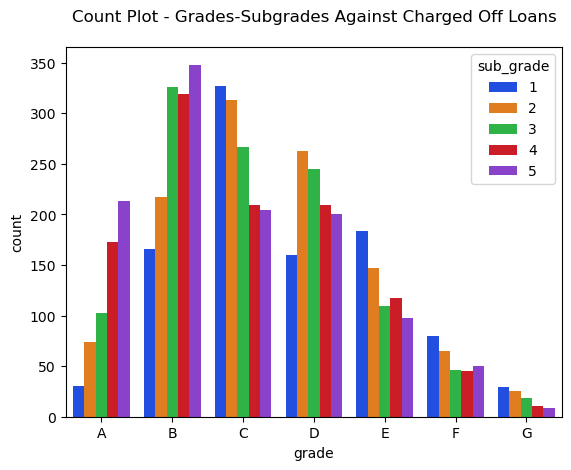

In [106]:
sns.countplot(
    data=loanDataF3[loanDataF3.loan_status == 'Charged Off'], 
    x='grade', 
    hue='sub_grade', 
    order=['A', 'B', 'C', 'D', 'E', 'F', 'G'],
    palette='bright'
    )
plt.title('Count Plot - Grades-Subgrades Against Charged Off Loans\n')
plt.show()

- SubGrade B3, B4, B5 & C1, C2, C3 have more applicants who have not paid the loans


#### Data Analysis - Home Ownership relation

In [107]:
loanDataF3['home_ownership'].value_counts()

home_ownership
RENT        17998
MORTGAGE    15656
OWN          2847
OTHER          90
NONE            3
Name: count, dtype: int64

- We can club NONE with OTHER as the values are very less

In [108]:
loanDataF3['home_ownership'] = loanDataF3['home_ownership'].replace('NONE', 'OTHER')

In [109]:
loanDataF3['home_ownership'].value_counts()

home_ownership
RENT        17998
MORTGAGE    15656
OWN          2847
OTHER          93
Name: count, dtype: int64

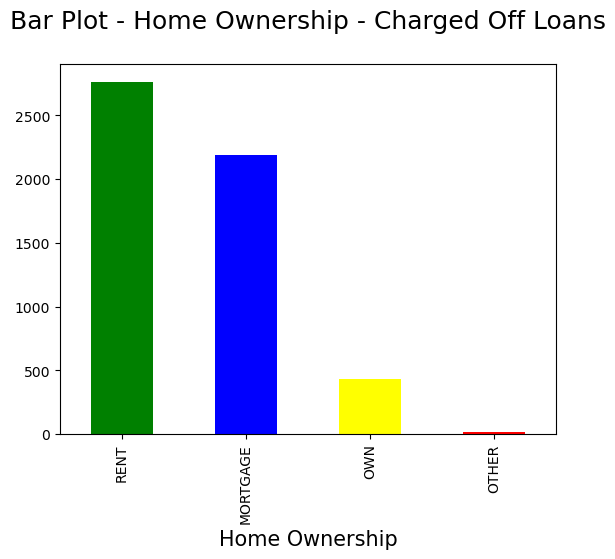

In [120]:
loanDataF3[loanDataF3['loan_status'] == 'Charged Off']['home_ownership'].value_counts().plot.bar(color=['green', 'blue', 'yellow', 'red'])
plt.xlabel('Home Ownership', fontdict={'fontsize':15})
plt.title('Bar Plot - Home Ownership - Charged Off Loans\n', fontdict={'fontsize':18})
plt.show()

- Clearly people who were on RENT or MORTGAGE have not paid the loans completely.

#### Data Analysis - Purpose

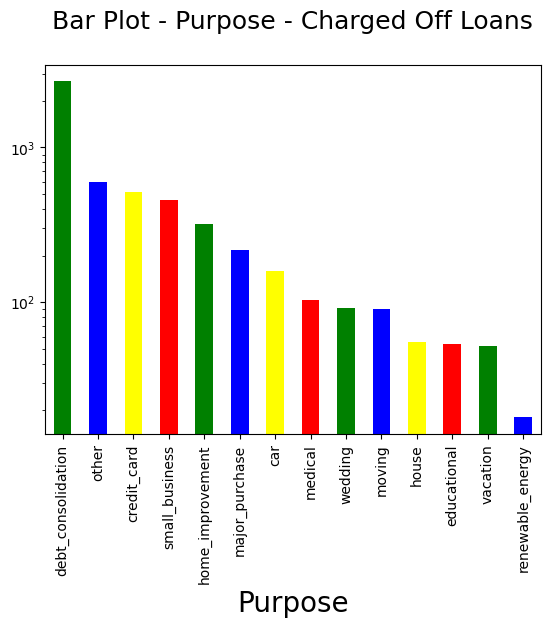

In [122]:
loanDataF3[loanDataF3['loan_status'] == 'Charged Off']['purpose'].value_counts().plot.bar(color=['green', 'blue', 'yellow', 'red'])
plt.xlabel('Purpose', fontdict={"fontsize": 20})
plt.yscale('log')
plt.title('Bar Plot - Purpose - Charged Off Loans\n', fontdict={'fontsize':18})
plt.show()

- These are the main purposes where the loan was taken but not paid back
    - debt_consolidation
    - other
    - credit_card
    - small_business
    - home_improvement

#### Data Analysis - Verification Status

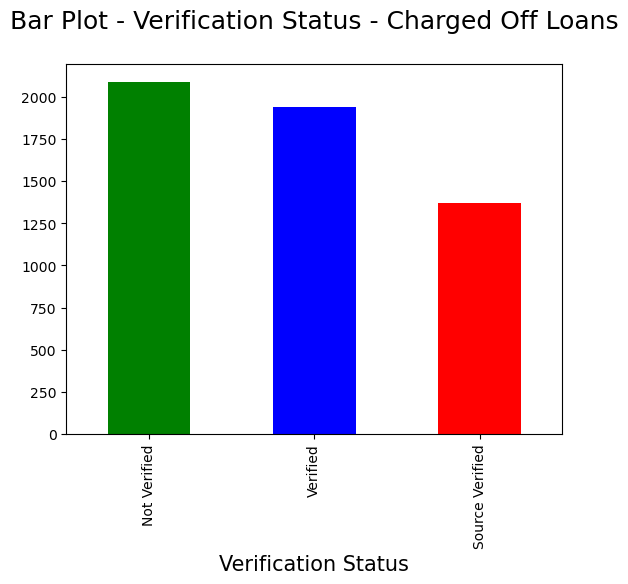

In [124]:
loanDataF3[loanDataF3['loan_status'] == 'Charged Off']['verification_status'].value_counts().plot.bar(color=['green', 'blue', 'red'])
plt.xlabel('Verification Status', fontdict={"fontsize": 15})
plt.title('Bar Plot - Verification Status - Charged Off Loans\n', fontdict={"fontsize": 18})
plt.show()

- Not Verified Loans have clearly not paid the loan back however, Verified is also very close. In any case, it is more likely that the applicant will be defaulted if the it is 'Not Verified' 

#### Data Analysis - emp_duration

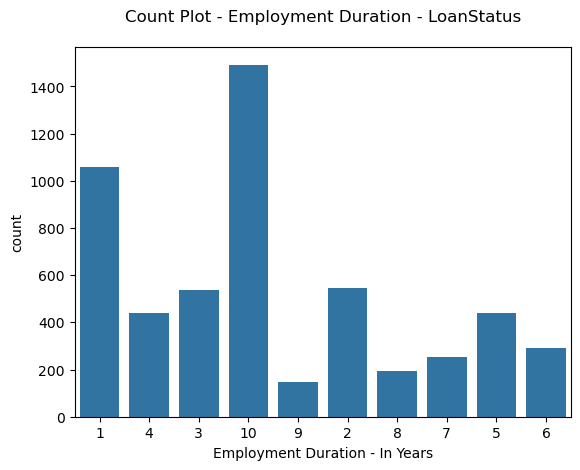

In [154]:
sns.countplot(data=loanDataF3[loanDataF3['loan_status'] == 'Charged Off'], x='emp_duration')
plt.xlabel('Employment Duration - In Years')
plt.title('Count Plot - Employment Duration - LoanStatus\n')
plt.show()

- If the Employment is 10+ years or if its less than or equal to 1 year, then the applicant is more likely to be a defaulter.

#### Data Analysis - Numerical Values

In [126]:
loanDataF3.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,installment,sub_grade,annual_inc,dti,inq_last_6mths,open_acc,pub_rec,total_acc,pub_rec_bankruptcies,term_of_loan,int_rate_percent,revol_cred_util_percent
count,36594.000000,36594.000000,36594.000000,36594.000000,36594.000000,36594.000000,36594.000000,36594.000000,36594.000000,36594.000000,36594.000000,36594.000000,36594.000000,36594.000000,36594.000000
mean,10688.855413,10442.495354,9901.130052,312.063480,3.051948,60864.620755,13.450680,0.863939,9.172159,0.056867,21.651937,0.043942,41.853419,11.883018,48.661597
std,7047.618381,6799.692443,6729.994933,199.223297,1.396032,27708.861333,6.660079,1.064292,4.351603,0.240393,11.228236,0.205634,10.306427,3.665969,28.281775
min,500.000000,500.000000,0.000000,15.690000,1.000000,4000.000000,0.000000,0.000000,2.000000,0.000000,2.000000,0.000000,36.000000,5.420000,0.000000
25%,5000.000000,5000.000000,4987.920800,163.110000,2.000000,40000.000000,8.350000,0.000000,6.000000,0.000000,13.000000,0.000000,36.000000,8.940000,25.300000
50%,9250.000000,9000.000000,8394.564067,270.680000,3.000000,56000.000000,13.580000,1.000000,8.000000,0.000000,20.000000,0.000000,36.000000,11.710000,49.000000
75%,15000.000000,14400.000000,13648.623847,408.875000,4.000000,77970.500000,18.720000,1.000000,12.000000,0.000000,28.000000,0.000000,36.000000,14.270000,72.100000
max,35000.000000,35000.000000,35000.000000,1305.190000,5.000000,140000.000000,29.990000,8.000000,44.000000,4.000000,90.000000,2.000000,60.000000,24.400000,99.900000


##### Installment

In [128]:
loanDataF3['installment'].describe()

count    36594.000000
mean       312.063480
std        199.223297
min         15.690000
25%        163.110000
50%        270.680000
75%        408.875000
max       1305.190000
Name: installment, dtype: float64

In [138]:
installment_bins = pd.cut(loanDataF3['installment'], bins=10, precision=0)
installment_bins.drop_duplicates()

0        (145.0, 274.0]
1         (14.0, 145.0]
3        (274.0, 403.0]
11       (403.0, 531.0]
21       (660.0, 789.0]
31      (918.0, 1047.0]
51       (789.0, 918.0]
55       (531.0, 660.0]
128    (1047.0, 1176.0]
756    (1176.0, 1305.0]
Name: installment, dtype: category
Categories (10, interval[float64, right]): [(14.0, 145.0] < (145.0, 274.0] < (274.0, 403.0] < (403.0, 531.0] ... (789.0, 918.0] < (918.0, 1047.0] < (1047.0, 1176.0] < (1176.0, 1305.0]]

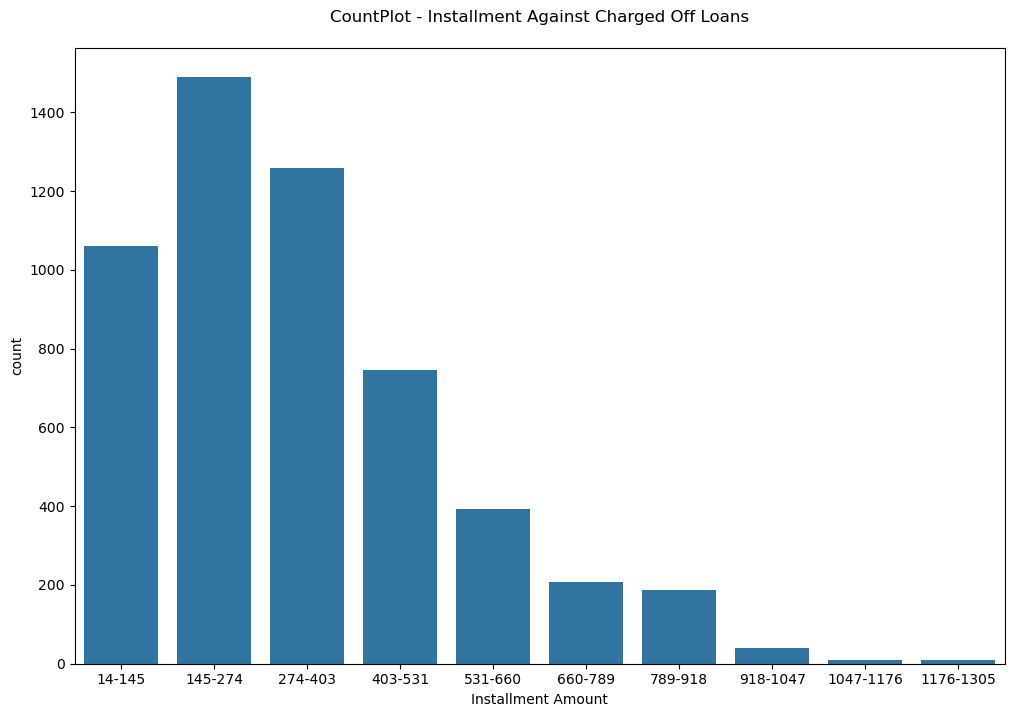

In [155]:
loanDataF3['installment_groups'] = pd.cut(loanDataF3['installment'], bins=10, labels=['14-145', '145-274', '274-403', '403-531', '531-660', '660-789', '789-918', '918-1047', '1047-1176', '1176-1305'])
plt.figure(figsize=(12, 8))
sns.countplot(data=loanDataF3[loanDataF3['loan_status'] == 'Charged Off'], x='installment_groups')
plt.xlabel('Installment Amount')
plt.title('CountPlot - Installment Against Charged Off Loans\n')
plt.show()

- If the Installment Amount is between 145-274, then it is more likely to be defaulted.

##### Debt-To-Income Ratio

In [156]:
loanDataF3['dti'].describe()

count    36594.000000
mean        13.450680
std          6.660079
min          0.000000
25%          8.350000
50%         13.580000
75%         18.720000
max         29.990000
Name: dti, dtype: float64

In [157]:
loanDataF3['dti'].value_counts()

dti
0.00     163
18.00     44
12.00     42
19.20     39
13.20     38
        ... 
28.41      1
26.46      1
27.69      1
26.61      1
25.43      1
Name: count, Length: 2848, dtype: int64

In [161]:
dti_bins = pd.cut(loanDataF3['dti'], bins=5, precision=0)
dti_bins.drop_duplicates()

0     (24.0, 30.0]
1      (-0.0, 6.0]
2      (6.0, 12.0]
3     (18.0, 24.0]
10    (12.0, 18.0]
Name: dti, dtype: category
Categories (5, interval[float64, right]): [(-0.0, 6.0] < (6.0, 12.0] < (12.0, 18.0] < (18.0, 24.0] < (24.0, 30.0]]

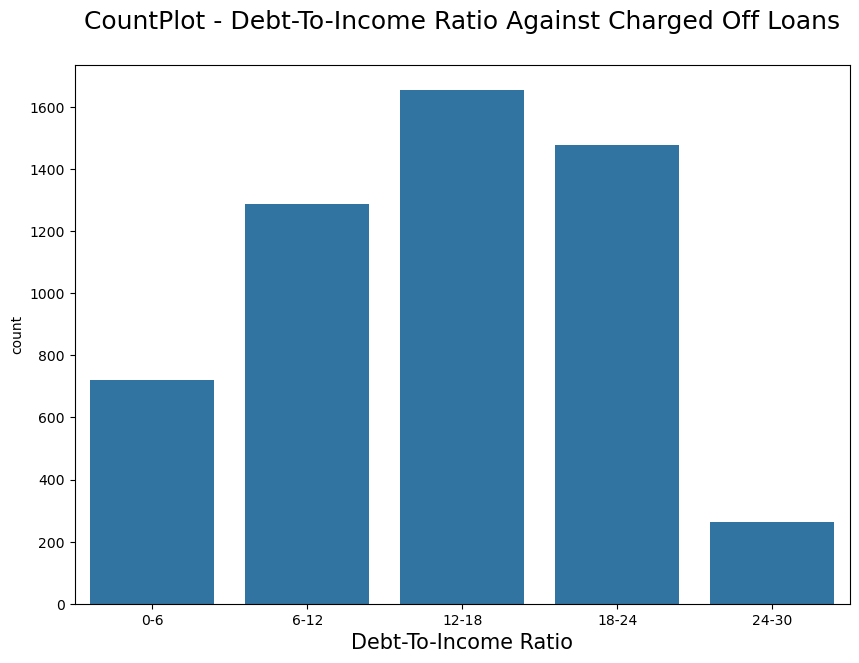

In [175]:
loanDataF3['dti_groups'] = pd.cut(loanDataF3['dti'], bins=5, precision=0, labels=['0-6', '6-12', '12-18', '18-24', '24-30'])
plt.figure(figsize=(10, 7))
sns.countplot(data=loanDataF3[loanDataF3['loan_status'] == 'Charged Off'], x='dti_groups')
plt.xlabel('Debt-To-Income Ratio', fontdict={'fontsize':15})
plt.title('CountPlot - Debt-To-Income Ratio Against Charged Off Loans\n', fontdict={'fontsize':18})
plt.show()

- If the Debt-To-Income Ratio is between 12 & 18, the applicant is more likely to be a defaulter

##### Inqueries in Last 6 months - inq_last_6mths

In [176]:
loanDataF3['inq_last_6mths'].describe()

count    36594.000000
mean         0.863939
std          1.064292
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          8.000000
Name: inq_last_6mths, dtype: float64

In [177]:
loanDataF3['inq_last_6mths'].value_counts()

inq_last_6mths
0    17836
1    10119
2     5326
3     2790
4      291
5      134
6       56
7       32
8       10
Name: count, dtype: int64

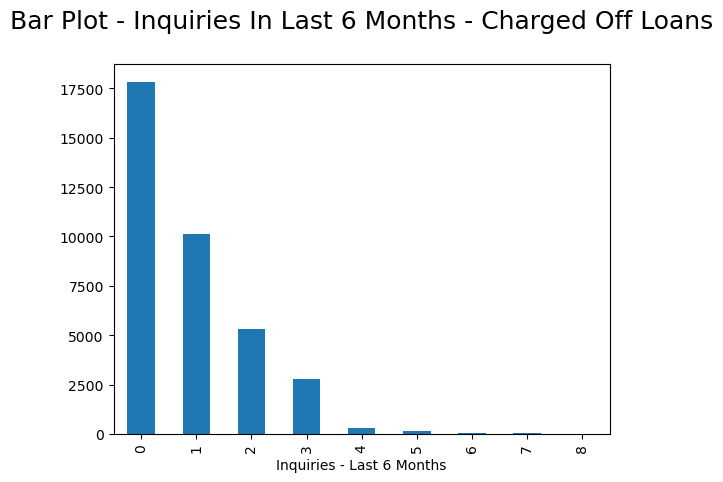

In [179]:
loanDataF3['inq_last_6mths'].value_counts().plot.bar()
plt.xlabel('Inquiries - Last 6 Months')
plt.title('Bar Plot - Inquiries In Last 6 Months - Charged Off Loans\n', fontdict={'fontsize':18})
plt.show()

- If there are no Inquiries made in last 6 months, the applicant is more likely to be defaulter.

##### Open Credit Lines - open_acc

In [180]:
loanDataF3['open_acc'].describe()

count    36594.000000
mean         9.172159
std          4.351603
min          2.000000
25%          6.000000
50%          8.000000
75%         12.000000
max         44.000000
Name: open_acc, dtype: float64

In [181]:
loanDataF3['open_acc'].value_counts()

open_acc
7     3773
6     3708
8     3662
9     3444
5     3023
10    2928
11    2487
4     2249
12    2045
13    1720
3     1430
14    1326
15    1050
16     817
17     643
2      575
18     466
19     342
20     249
21     216
22     129
23      81
24      64
25      52
26      27
28      21
27      21
30      11
29       8
31       6
34       5
32       3
33       3
35       3
36       2
39       1
38       1
44       1
41       1
42       1
Name: count, dtype: int64

In [189]:
open_acc_bins = pd.cut(loanDataF3['open_acc'], bins=5, precision=0)
open_acc_bins.value_counts()

open_acc
(2.0, 10.0]     24792
(10.0, 19.0]    10554
(19.0, 27.0]     1181
(27.0, 36.0]       60
(36.0, 44.0]        7
Name: count, dtype: int64

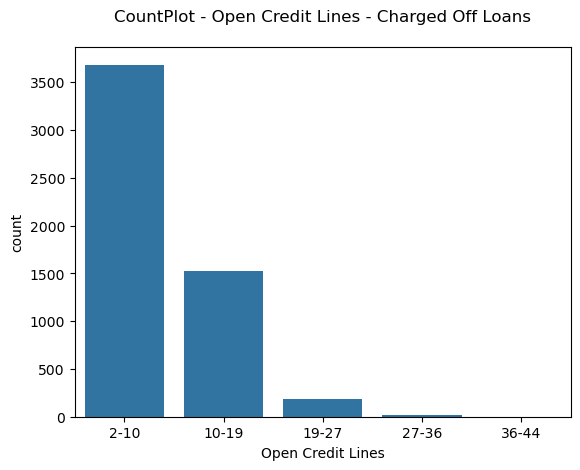

In [190]:
loanDataF3['open_acc_groups'] = pd.cut(loanDataF3['open_acc'], bins=5, precision=0, labels=['2-10', '10-19', '19-27', '27-36', '36-44'])
sns.countplot(data=loanDataF3[loanDataF3['loan_status'] == 'Charged Off'], x='open_acc_groups')
plt.xlabel('Open Credit Lines')
plt.title('CountPlot - Open Credit Lines - Charged Off Loans\n')
plt.show()

- Applicants with Open Credit Lines between 2 & 10 are more likely to be defaulters.

##### Derogatory Public Records - pub_rec

In [191]:
loanDataF3['pub_rec'].describe()

count    36594.000000
mean         0.056867
std          0.240393
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          4.000000
Name: pub_rec, dtype: float64

In [192]:
loanDataF3['pub_rec'].value_counts()

pub_rec
0    34577
1     1963
2       46
3        6
4        2
Name: count, dtype: int64

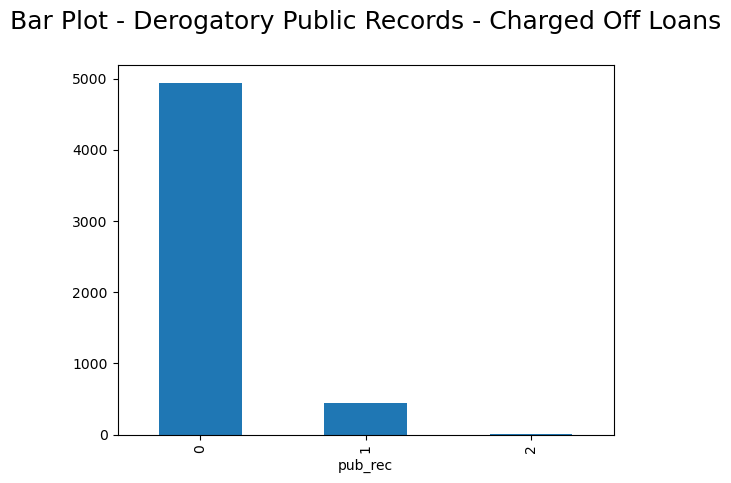

In [193]:
loanDataF3[loanDataF3['loan_status'] == 'Charged Off']['pub_rec'].value_counts().plot.bar()
plt.title('Bar Plot - Derogatory Public Records - Charged Off Loans\n', fontdict={'fontsize':18})
plt.show()

- Even though the data shows that applicants with Zero Public Records are more defaulters, it wouldn't be right to conclude on this basis. Hence, we won't be considering this attribute for decision making

##### Total Credit Lines - total_acc

In [194]:
loanDataF3['total_acc'].describe()

count    36594.000000
mean        21.651937
std         11.228236
min          2.000000
25%         13.000000
50%         20.000000
75%         28.000000
max         90.000000
Name: total_acc, dtype: float64

In [203]:
total_acc_bins = pd.cut(loanDataF3[loanDataF3['loan_status'] == 'Charged Off']['total_acc'], bins=5, precision=0)
total_acc_bins.value_counts()

total_acc
(2.0, 16.0]     2176
(16.0, 31.0]    2166
(31.0, 45.0]     894
(45.0, 60.0]     133
(60.0, 74.0]      31
Name: count, dtype: int64

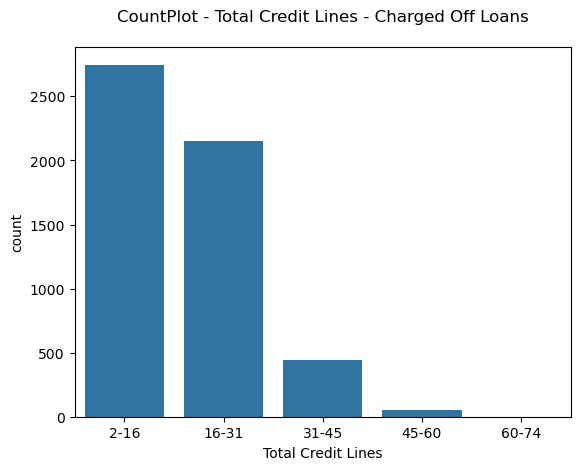

In [204]:
loanDataF3['total_acc_groups'] = pd.cut(loanDataF3['total_acc'], bins=5, precision=0, labels=['2-16', '16-31', '31-45', '45-60', '60-74'])
sns.countplot(data=loanDataF3[loanDataF3['loan_status'] == 'Charged Off'], x='total_acc_groups')
plt.xlabel('Total Credit Lines')
plt.title('CountPlot - Total Credit Lines - Charged Off Loans\n')
plt.show()

- If the Total Number of Credit Lines are between 2 to 16, the applicant is most likely to be a defaulter

##### Bankruptcies - pub_rec_bankruptcies

In [205]:
loanDataF3['pub_rec_bankruptcies'].describe()

count    36594.000000
mean         0.043942
std          0.205634
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          2.000000
Name: pub_rec_bankruptcies, dtype: float64

In [206]:
loanDataF3['pub_rec_bankruptcies'].value_counts()

pub_rec_bankruptcies
0.0    34991
1.0     1598
2.0        5
Name: count, dtype: int64

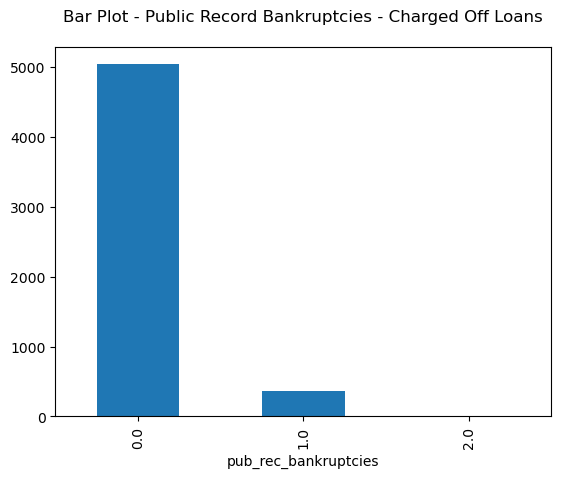

In [209]:
loanDataF3[loanDataF3['loan_status'] == 'Charged Off']['pub_rec_bankruptcies'].value_counts().plot.bar()
plt.title('Bar Plot - Public Record Bankruptcies - Charged Off Loans\n')
plt.show()

- Even though the data indicates applicants with no Bankruptcies are more likely to be a defaulter, it wouldn't be right to conclude on this. Hence, we will not be considering Bankruptcy as a factor for our analysis

##### Term Of Loan

In [215]:
loanDataF3['term_of_loan'].describe()

count    36594.000000
mean        41.853419
std         10.306427
min         36.000000
25%         36.000000
50%         36.000000
75%         36.000000
max         60.000000
Name: term_of_loan, dtype: float64

In [216]:
loanDataF3['term_of_loan'].value_counts()

term_of_loan
36    27669
60     8925
Name: count, dtype: int64

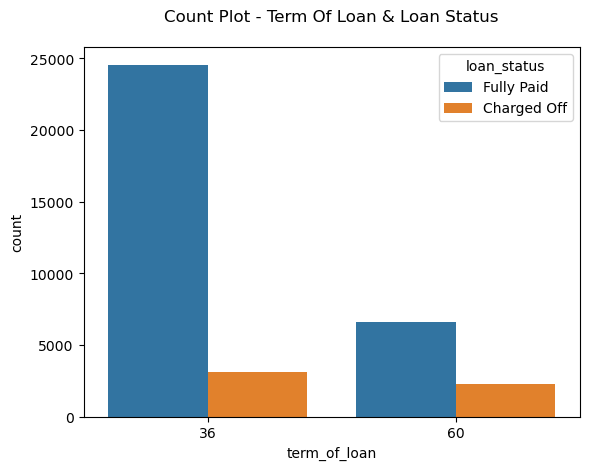

In [217]:
sns.countplot(data=loanDataF3, x='term_of_loan', hue='loan_status')
plt.title('Count Plot - Term Of Loan & Loan Status\n')
plt.show()

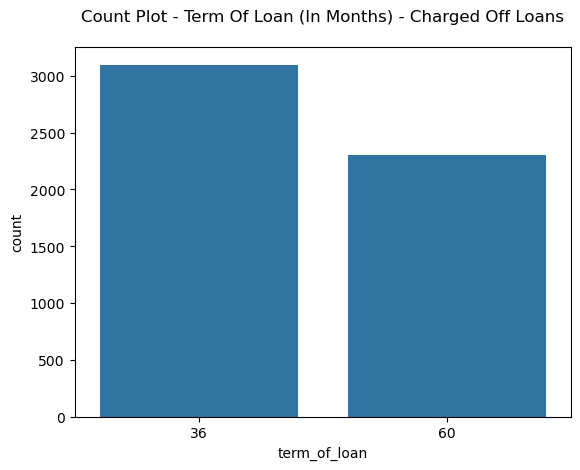

In [218]:
sns.countplot(data=loanDataF3[loanDataF3['loan_status'] == 'Charged Off'] , x='term_of_loan')
plt.title('Count Plot - Term Of Loan (In Months) - Charged Off Loans\n')
plt.show()

- If the Term of Loan is 36 Months, it is more likely to be Defaulted

##### Interest Rate Percentage - int_rate_percent 

In [219]:
loanDataF3['int_rate_percent'].describe()

count    36594.000000
mean        11.883018
std          3.665969
min          5.420000
25%          8.940000
50%         11.710000
75%         14.270000
max         24.400000
Name: int_rate_percent, dtype: float64

In [220]:
loanDataF3['int_rate_percent'].value_counts()

int_rate_percent
10.99    863
7.51     768
11.49    755
13.49    722
7.88     702
        ... 
10.64      1
18.36      1
22.94      1
22.64      1
15.01      1
Name: count, Length: 370, dtype: int64

In [224]:
int_rate_perc_bins = pd.cut(loanDataF3['int_rate_percent'], bins=5, precision=0)
int_rate_perc_bins.value_counts()

int_rate_percent
(9.0, 13.0]     13460
(13.0, 17.0]    10152
(5.0, 9.0]       9444
(17.0, 21.0]     3082
(21.0, 24.0]      456
Name: count, dtype: int64

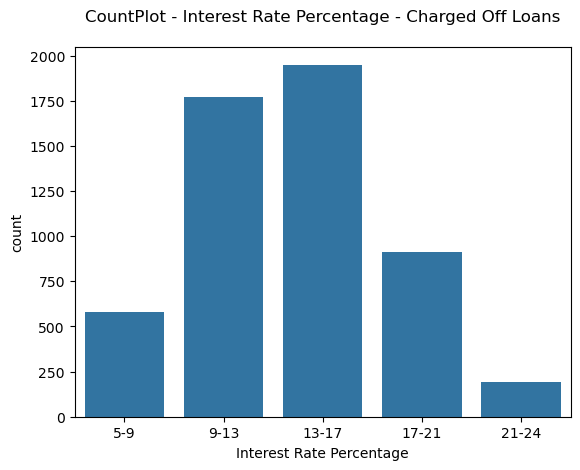

In [225]:
loanDataF3['int_rate_groups'] = pd.cut(loanDataF3['int_rate_percent'], bins=5, precision=0, labels=['5-9', '9-13', '13-17', '17-21', '21-24'])
sns.countplot(data=loanDataF3[loanDataF3['loan_status'] == 'Charged Off'], x='int_rate_groups')
plt.xlabel('Interest Rate Percentage')
plt.title('CountPlot - Interest Rate Percentage - Charged Off Loans\n')
plt.show()

- If the Interest Rate Percentage is between 13 & 17, it is more likely to be defaulted.

##### Revolving Credit Utilization Precentage - revol_cred_util_percent

In [226]:
loanDataF3['revol_cred_util_percent'].describe()

count    36594.000000
mean        48.661597
std         28.281775
min          0.000000
25%         25.300000
50%         49.000000
75%         72.100000
max         99.900000
Name: revol_cred_util_percent, dtype: float64

In [227]:
loanDataF3['revol_cred_util_percent'].value_counts()

revol_cred_util_percent
0.00     885
63.00     61
0.20      60
66.70     56
40.70     55
        ... 
77.63      1
25.74      1
0.83       1
47.36      1
7.28       1
Name: count, Length: 1082, dtype: int64

In [228]:
revol_credit_bins = pd.cut(loanDataF3['revol_cred_util_percent'], bins=10, precision=0)
revol_credit_bins.value_counts()

revol_cred_util_percent
(-0.1, 10.0]     4140
(40.0, 50.0]     4012
(50.0, 60.0]     4006
(60.0, 70.0]     3903
(30.0, 40.0]     3835
(70.0, 80.0]     3688
(20.0, 30.0]     3563
(80.0, 90.0]     3387
(10.0, 20.0]     3144
(90.0, 100.0]    2916
Name: count, dtype: int64

- Looks like the data is evenly distributed. We won't be able to come to any conclusion on this attribute

#### Univariate Data Analysis - Conclusion
- Applicant is more likely to be a defaulter: 
    - If the Applicant belongs to Grade B or C
    - If the Applicant belongs to SubGrade B3, B4, B5 & C1, C2
    - If the Applicant is living on Rental property
    - If the Applicant gets another loan to pay off existing loans (Debt Consolidation)
    - If the Employment Duration is 10+ years
    - If the Installment Amount is between 145-274
    - If the Debt-To-Income Ratio is between 12 & 18
    - If there are no Inquiries made in last 6 months
    - If the Open Credit Lines are between 2 & 10
    - If the Total Number of Credit Lines are between 2 to 16
    - If the Term of Loan is 36 Months
    - If the Interest Rate Percentage is between 13 & 17